In [24]:
import numpy as np
rnd_gen = np.random.default_rng(2024)
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from online_cp.CPS import NearestNeighboursPredictionMachine, DempsterHillConformalPredictiveSystem, RidgePredictionMachine

In [25]:
N = 1000
X = rnd_gen.normal(loc=0, scale=1, size=(N, 4))
beta = np.array([2, 1, 0, 0])
Y = X @ beta + rnd_gen.normal(loc=0, scale=1, size=N)

In [26]:
X_train = X[:-1]
y_train = Y[:-1]

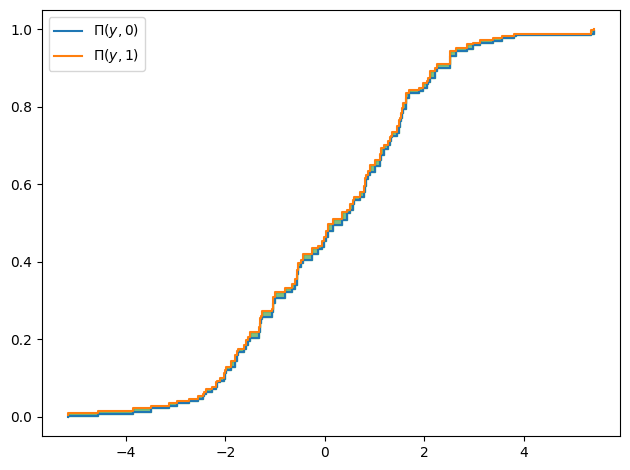

In [27]:
cps = NearestNeighboursPredictionMachine(k=100)

cps.learn_initial_training_set(X_train, y_train)

cpd = cps.predict_cpd(X_train[-1])

cpd.plot()

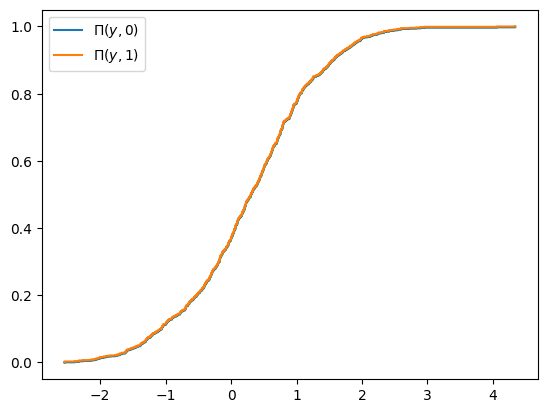

In [28]:
cps = RidgePredictionMachine()

cps.learn_initial_training_set(X_train, y_train)

cpd = cps.predict_cpd(X_train[-1])

cpd.plot()

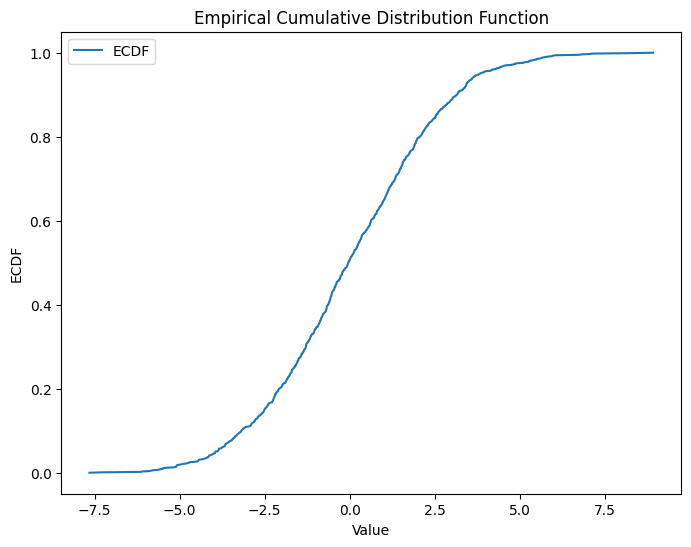

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF

# Compute the ECDF
ecdf = ECDF(Y)

# Plot the ECDF
plt.figure(figsize=(8, 6))
plt.plot(ecdf.x, ecdf.y, label='ECDF')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Function')
plt.legend()
plt.show()